In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nbdir = "/content/drive/MyDrive/DS_ML_Project/heart_attack_prediction/"

In [ ]:
%cd /content/drive/MyDrive/DS_ML_Project/heart_attack_prediction/

/content/drive/MyDrive/DS_ML_Project/heart_attack_prediction


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/heart_attack_prediction_dataset.csv')


In [ ]:
df.head()

,Patient_ID,Age,Sex,Cholesterol,Blood_Pressure,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,...,Sedentary_Hours_Per_Day,Income,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Country,Continent,Hemisphere,Heart_Attack_Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
print("Initial Missing values:\n", df.isnull().sum())
print("Data types:\n", df.dtypes)

Initial Missing values:
 Patient_ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood_Pressure                     0
Heart_Rate                         0
Diabetes                           0
Family_History                     0
Smoking                            0
Obesity                            0
Alcohol_Consumption                0
Exercise_Hours_Per_Week            0
Diet                               0
Previous_Heart_Problems            0
Medication_Use                     0
Stress_Level                       0
Sedentary_Hours_Per_Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical_Activity_Days_Per_Week    0
Sleep_Hours_Per_Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart_Attack_Risk                  0
dtype: int64


In [ ]:
columns = df.columns

for column in columns:
    if (df[column].dtype == 'object'):
        df[column] = df[column].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Patient_ID                       8763 non-null   category
 1   Age                              8763 non-null   int64   
 2   Sex                              8763 non-null   category
 3   Cholesterol                      8763 non-null   int64   
 4   Blood_Pressure                   8763 non-null   category
 5   Heart_Rate                       8763 non-null   int64   
 6   Diabetes                         8763 non-null   int64   
 7   Family_History                   8763 non-null   int64   
 8   Smoking                          8763 non-null   int64   
 9   Obesity                          8763 non-null   int64   
 10  Alcohol_Consumption              8763 non-null   int64   
 11  Exercise_Hours_Per_Week          8763 non-null   float64 
 12  Diet  

In [ ]:
df.Sex.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# Converting 'Sex' column to numeric (Male = 0, Female = 1)
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})

print(df['Sex'].head())


0    0
1    0
2    1
3    0
4    0
Name: Sex, dtype: category
Categories (2, int64): [1, 0]


In [ ]:
df.Diet.unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [ ]:
df['Diet'] = df['Diet'].map({'Average': 0, 'Unhealthy': 1, 'Healthy': 2})

print(df['Diet'].head())


0    0
1    1
2    2
3    0
4    1
Name: Diet, dtype: category
Categories (3, int64): [0, 2, 1]


In [ ]:
df.Country.unique()

['Argentina', 'Canada', 'France', 'Thailand', 'Germany', ..., 'New Zealand', 'South Korea', 'Australia', 'Colombia', 'United Kingdom']
Length: 20
Categories (20, object): ['Argentina', 'Australia', 'Brazil', 'Canada', ..., 'Thailand',
                          'United Kingdom', 'United States', 'Vietnam']

In [ ]:
df.Continent.unique()

['South America', 'North America', 'Europe', 'Asia', 'Africa', 'Australia']
Categories (6, object): ['Africa', 'Asia', 'Australia', 'Europe', 'North America',
                         'South America']

In [ ]:
df.Hemisphere.unique()

['Southern Hemisphere', 'Northern Hemisphere']
Categories (2, object): ['Northern Hemisphere', 'Southern Hemisphere']

In [ ]:
df.drop(columns=['Patient_ID'], inplace=True)

print(df.columns)


Index(['Age', 'Sex', 'Cholesterol', 'Heart_Rate', 'Diabetes', 'Family_History',
       'Smoking', 'Obesity', 'Alcohol_Consumption', 'Exercise_Hours_Per_Week',
       'Diet', 'Previous_Heart_Problems', 'Medication_Use', 'Stress_Level',
       'Sedentary_Hours_Per_Day', 'Income', 'BMI', 'Triglycerides',
       'Physical_Activity_Days_Per_Week', 'Sleep_Hours_Per_Day', 'Country',
       'Continent', 'Hemisphere', 'Heart_Attack_Risk', 'Systolic_BP',
       'Diastolic_BP'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Blood_Pressure                   8763 non-null   object 
 4   Heart_Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family_History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol_Consumption              8763 non-null   int64  
 10  Exercise_Hours_Per_Week          8763 non-null   float64
 11  Diet                             8763 non-null   int64  
 12  Previous_Heart_Probl

In [ ]:
df.drop(columns=['Country', 'Continent','Hemisphere'], inplace=True)

print(df.columns)


Index(['Age', 'Sex', 'Cholesterol', 'Heart_Rate', 'Diabetes', 'Family_History',
       'Smoking', 'Obesity', 'Alcohol_Consumption', 'Exercise_Hours_Per_Week',
       'Diet', 'Previous_Heart_Problems', 'Medication_Use', 'Stress_Level',
       'Sedentary_Hours_Per_Day', 'Income', 'BMI', 'Triglycerides',
       'Physical_Activity_Days_Per_Week', 'Sleep_Hours_Per_Day',
       'Heart_Attack_Risk', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')


In [ ]:
split_data = df['Blood_Pressure'].str.split('/', expand=True)

df['Systolic_BP'] = split_data[0]
df['Diastolic_BP'] = split_data[1]


df['Systolic_BP'] = df['Systolic_BP'].astype('int64')
df['Diastolic_BP'] = df['Diastolic_BP'].astype('int64')

df.drop(columns=['Blood_Pressure'], inplace=True)

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix['Heart_Attack_Risk'].sort_values(ascending=False))


Heart_Attack_Risk                  1.000000
Cholesterol                        0.019340
Systolic_BP                        0.018585
Diabetes                           0.017225
Exercise_Hours_Per_Week            0.011133
Triglycerides                      0.010471
Diet                               0.010411
Income                             0.009628
Age                                0.006403
Medication_Use                     0.002234
Previous_Heart_Problems            0.000274
BMI                                0.000020
Family_History                    -0.001652
Sex                               -0.003095
Smoking                           -0.004051
Stress_Level                      -0.004111
Heart_Rate                        -0.004251
Physical_Activity_Days_Per_Week   -0.005014
Sedentary_Hours_Per_Day           -0.005613
Diastolic_BP                      -0.007509
Obesity                           -0.013318
Alcohol_Consumption               -0.013778
Sleep_Hours_Per_Day             

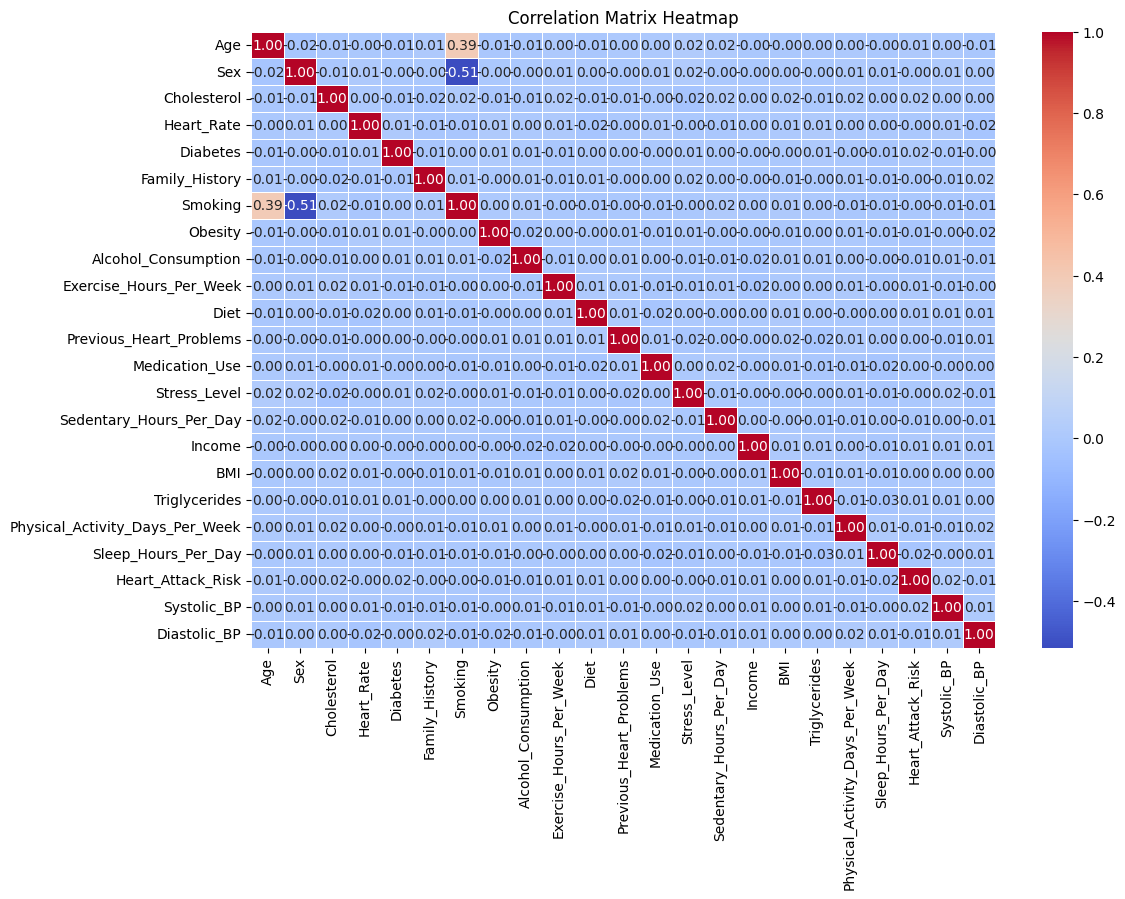

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
df.Diastolic_BP

,Diastolic_BP
0,88
1,93
2,99
3,100
4,88
...,...
8758,76
8759,102
8760,75
8761,67


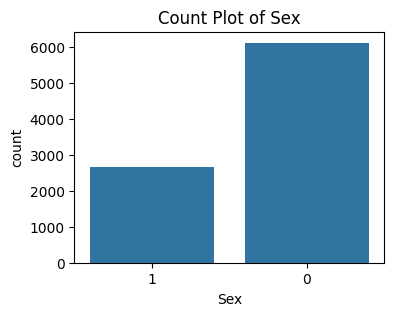

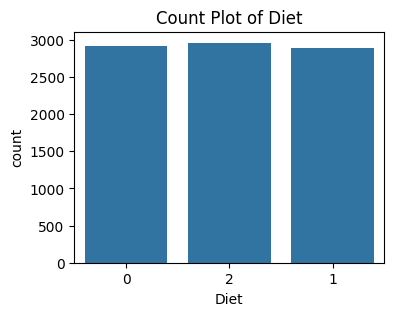

In [ ]:
import seaborn as sns
columns = ['Sex', 'Diet']

for column in columns:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=column, data=df)
    plt.title(f'Count Plot of {column}')
    plt.show()

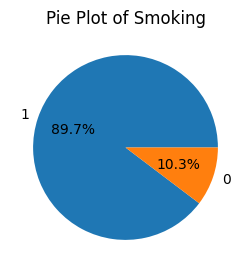

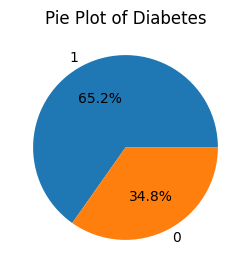

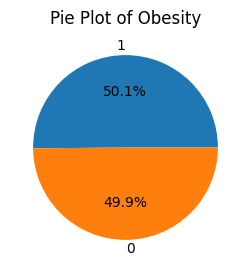

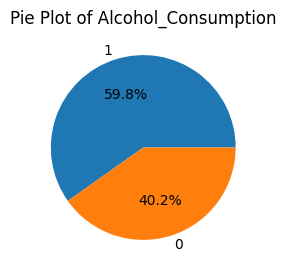

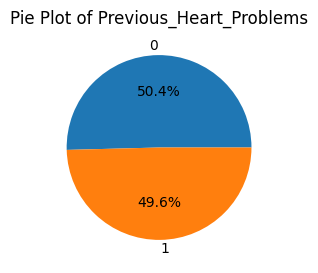

In [ ]:
columns = ["Smoking", "Diabetes", "Obesity", "Alcohol_Consumption","Previous_Heart_Problems"]

for column in columns:
    plt.figure(figsize=(4, 3))
    counts = df[column].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Plot of {column}')
    plt.show()

In [ ]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart_Rate', 'Diabetes', 'Family_History',
       'Smoking', 'Obesity', 'Alcohol_Consumption', 'Exercise_Hours_Per_Week',
       'Diet', 'Previous_Heart_Problems', 'Medication_Use', 'Stress_Level',
       'Sedentary_Hours_Per_Day', 'Income', 'BMI', 'Triglycerides',
       'Physical_Activity_Days_Per_Week', 'Sleep_Hours_Per_Day',
       'Heart_Attack_Risk', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')

In [ ]:
X = df.drop('Heart_Attack_Risk', axis=1)
y = df['Heart_Attack_Risk']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
cols_to_scale = X.columns

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(X_train[cols_to_scale])

X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [ ]:
lr = LogisticRegression(C = 100, max_iter=1000)
lr.fit(X_train , y_train)

LogisticRegression(C=100, max_iter=1000)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6343411294922989


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1148
           1       0.00      0.00      0.00       605

    accuracy                           0.65      1753
   macro avg       0.33      0.50      0.40      1753
weighted avg       0.43      0.65      0.52      1753



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train , y_train)


DecisionTreeClassifier()

In [ ]:
dtc_score = dtc.score(X_test , y_test)
print(dtc_score * 100)

53.622361665715914


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1148
           1       0.00      0.00      0.00       605

    accuracy                           0.65      1753
   macro avg       0.33      0.50      0.40      1753
weighted avg       0.43      0.65      0.52      1753



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
